# Calcul/Analyse préconception système vanne

Le thème d'etude est la vanne de prise d'air d'un avion de ligne.
Nous souhaitons motoriser ce système à l'aide d'un actionneur linéaire à l'aide d'un vérin électrique.Voir si dessous:


Image

Nous devons donc:
- Choisir une architecture pour le dispositif de commande 
- Choisir un actionneur 
- Faire la maquette numérique de notre conception

Mais avant toute chose nous devons faire une analyse de préconception en:
- Calculant le degré d'hyperstatisme de ce mécanisme
- Ecrivant les deux équations scalaires issues de la fermeture géometrique du système et en déterminer la loi entrée/sortie de ce mécanisme 
- Estimant l'effort aérodynamique de la pièce 2, en position fermée

## Shéma cinématique:


Image




## Hyperstatisme:

### degrée mobilité:

In [13]:
import math
from sympy import Symbol, Eq, solve

""" Mécanisme Plan """

Np = 4                          # nb de pièce avec bati
NL1 = 4                        # nb de liaisons à 1 degré de liberté
NL2 = 0                        # nb de liaisons à 1 degré de liberté

mu = 3*(Np-1)-2*NL1-2*NL2

print(f"Le degrée de mobilité du mécanisme plan est de {mu}")

Le degrée de mobilité du mécanisme plan est de 1


### degrée d'hyperstatisme:

In [7]:
Es = 6*(Np-1)
S = 4*5
me = Es-S
h = mu-me

print(f"Le degrée d'hyperstatisme du mécanisme plan est de {h}")

Le degrée d'hyperstatisme du mécanisme plan est de 3


## Loi entrée/sortie 
Voici le shéma qui represente les angle et blablabla:


Image


Nous cherchons donc à déterminé theta_4 par rapport à theta_2

### Equation scalaire de fermeture:

vect_OA + vect_AB + vect_BC + vect_CO = vect_nul

ce qui implique:

vect_OC = vect_OA + vect_AB + vect_BC

### Projection en x et y:

In [1]:
from sympy import symbols, Eq, solve, cos, sin
import numpy as np
import matplotlib.pyplot as plt

theta_2 = 1
xc = 600
yc = 200
l2 = 30
l3 = 40
l4 = 50
theta_4 = symbols('theta_4')
list_res_1 = []
list_res_2 = []

for i in range(0,10):
    X = xc - l4*cos(theta_2)
    Y = yc - l4*sin(theta_2)
    
    equation = Eq((X-l4*cos(theta_4))**2 + (Y-l4*sin(theta_4))**2, l3**2)
    
    solution = solve(equation, theta_4)
    
    solutions_numeriques = [sol.evalf() for sol in solution]
    
    list_res_1.append(solutions_numeriques[0])
    list_res_2.append(solutions_numeriques[1])
    theta_2 = theta_2 + 1

print(list_res_1)
print(list_res_2)


[0.2689431073519 - 2.47087389376925*I, 0.243967645544388 + 2.54511673520939*I, 0.288762520353956 + 2.60295321417517*I, 0.359580102638335 + 2.60050953493981*I, 0.400386311602165 - 2.53939013619793*I, 0.36980095852492 - 2.46689498773832*I, 0.288941009274204 - 2.45766411528304*I, 0.242983555298292 + 2.52265207213652*I, 0.271051571845451 + 2.59169251322617*I, 0.340163917759427 + 2.6080250561383*I]
[0.2689431073519 + 2.47087389376925*I, 0.243967645544388 - 2.54511673520939*I, 0.288762520353956 - 2.60295321417517*I, 0.359580102638335 - 2.60050953493981*I, 0.400386311602165 + 2.53939013619793*I, 0.36980095852492 + 2.46689498773832*I, 0.288941009274204 + 2.45766411528304*I, 0.242983555298292 - 2.52265207213652*I, 0.271051571845451 - 2.59169251322617*I, 0.340163917759427 - 2.6080250561383*I]


[         nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan 179.99999869
 179.99999891 179.99999899 179.99999905 179.99999909 179.99999913
 179.99999916 179.99999918 179.9999992  179.99999922 179.99999924
 179.99999925 179.99999927 179.99999928 179.99999929 179.9999993
 179.99999931 179.99999932 179.99999933 179.99999934 179.99999935
 179.99999935 179.99999936 179.99999937 179.99999937 179.99999938
 179.99999938 179.99999939 179.9999994  179.9999994  179.99999941
 179.99999941 179.99999941 179.99999942 179.99999942 179.99999943
 179.999999

C:\Users\chp4223a\AppData\Local\Temp\ipykernel_12000\252141295.py:24: RuntimeWarning: invalid value encountered in sqrt
  t1 = (-B+np.sqrt(delta))/2*A
C:\Users\chp4223a\AppData\Local\Temp\ipykernel_12000\252141295.py:25: RuntimeWarning: invalid value encountered in sqrt
  t2 = (-B-np.sqrt(delta))/2*A


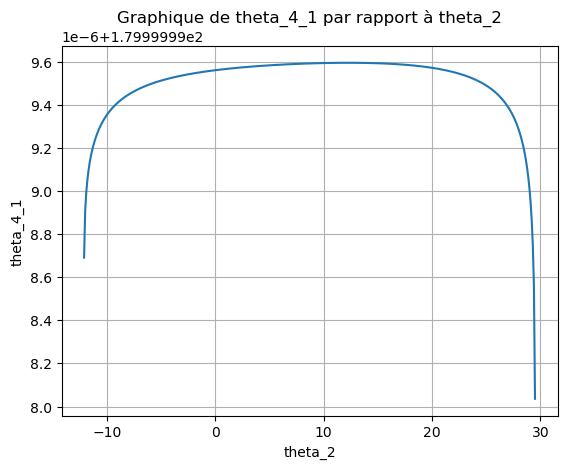

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Créer un tableau de valeurs x de 0 à 2π avec un pas de 0.1

theta_2 = np.arange(-16,30, 0.1)

l2 = 62
l3 = 378
l4 = 20

xc = 450
yc = 70

X = xc-l2*np.cos(np.radians(theta_2))
Y = yc-l2*np.sin(np.radians(theta_2))

A = X**2+2*X*l4+l4**2-l3**2
B = -4*Y*l4
C = X**2-2*X*l4+Y**2+l4**2-l3**2

delta = B**2 - 4*A*C

t1 = (-B+np.sqrt(delta))/2*A   
t2 = (-B-np.sqrt(delta))/2*A   

# Calculer les valeurs correspondantes de la fonction sinus
theta_4_1 = np.degrees(2*np.arctan(t1))
theta_4_2 = np.degrees(2*np.arctan(t2))

print(theta_4_1)
# Tracer le graphique
plt.plot(theta_2, theta_4_1)
plt.title('Graphique de theta_4_1 par rapport à theta_2')
plt.xlabel('theta_2')
plt.ylabel('theta_4_1')
plt.grid(True)
plt.show()
